<a href="https://colab.research.google.com/github/Aparna2006/walmart-retail/blob/main/walmart_ai_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
!wget https://raw.githubusercontent.com/Aparna2006/walmart-retail/main/data/walmart_full_dataset.csv

--2025-08-06 16:57:19--  https://raw.githubusercontent.com/Aparna2006/walmart-retail/main/data/walmart_full_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 730 [text/plain]
Saving to: ‘walmart_full_dataset.csv.10’

walmart_full_datase 100%[===================>]     730  --.-KB/s    in 0s      

2025-08-06 16:57:19 (40.8 MB/s) - ‘walmart_full_dataset.csv.10’ saved [730/730]



In [158]:
import pandas as pd
import numpy as np

In [159]:
df = pd.read_csv("walmart_full_dataset.csv")
df.head()

,Product,Category,Sales,Stock,Discount (%),Store ID,Date
0,Milk,Dairy,560,34,10.5,Store-4,2023-02-12
1,Chips,Snacks,230,58,5.0,Store-2,2023-07-25
2,Soap,Personal Care,185,40,8.2,Store-7,2023-03-30
3,Juice,Beverages,340,67,12.0,Store-1,2024-01-18
4,Eggs,Dairy,890,23,6.5,Store-5,2024-08-11


In [160]:
df['Date'] = pd.to_datetime(df['Date'])


In [161]:
df.isnull().sum()  # Check for missing values
df.dropna(inplace=True)  # Drop if any

In [162]:
daily_sales = df.groupby("Date")["Sales"].sum().reset_index()
daily_sales.columns = ["ds", "y"]  # Prophet needs these column names

In [163]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.weekday

In [164]:
df = pd.get_dummies(df, columns=['Category', 'Store ID'], drop_first=True)

In [165]:
df.to_csv("cleaned_sales.csv", index=False)
daily_sales.to_csv("daily_sales.csv", index=False)

In [166]:
!pip install prophet

In [167]:
df = pd.read_csv("daily_sales.csv")  # or your own file

# Rename columns
df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Convert ds column to datetime
df['ds'] = pd.to_datetime(df['ds'])

# Fit the model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ft4akvo/a7xobtxe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ft4akvo/kpzoig4v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99258', 'data', 'file=/tmp/tmp3ft4akvo/a7xobtxe.json', 'init=/tmp/tmp3ft4akvo/kpzoig4v.json', 'output', 'file=/tmp/tmp3ft4akvo/prophet_modelb3cmxau5/prophet_model-20250806165726.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:57:26 - cmdstanpy - INFO - Chain [1] start processing
I

In [168]:
print(df.columns)
df.head()

Index(['ds', 'y'], dtype='object')


,ds,y
0,2023-02-12,560
1,2023-03-30,185
2,2023-07-25,230
3,2023-08-06,390
4,2023-09-15,220


In [169]:
df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

In [170]:
# Strip extra spaces from column names
df.columns = df.columns.str.strip().str.lower()

# Now rename correctly
df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Now convert 'ds' to datetime
df['ds'] = pd.to_datetime(df['ds'])

In [171]:
df = pd.read_csv("daily_sales.csv")

# Clean column names first
df.columns = df.columns.str.strip().str.lower()

# Rename for Prophet
df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Convert to datetime
df['ds'] = pd.to_datetime(df['ds'])

# Now fit the model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ft4akvo/7gjkyvtd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ft4akvo/s_y6ca8i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59382', 'data', 'file=/tmp/tmp3ft4akvo/7gjkyvtd.json', 'init=/tmp/tmp3ft4akvo/s_y6ca8i.json', 'output', 'file=/tmp/tmp3ft4akvo/prophet_modelzq_lbb3a/prophet_model-20250806165726.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:57:26 - cmdstanpy - INFO - Chain [1] start processing
I

In [172]:
print(df.columns)

Index(['ds', 'y'], dtype='object')


In [173]:
df = pd.read_csv("daily_sales.csv")

# Rename the columns to match Prophet's requirement
df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Convert 'ds' to datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Now fit the model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ft4akvo/mps8atnd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ft4akvo/uq7liq48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89477', 'data', 'file=/tmp/tmp3ft4akvo/mps8atnd.json', 'init=/tmp/tmp3ft4akvo/uq7liq48.json', 'output', 'file=/tmp/tmp3ft4akvo/prophet_model6aiw96rw/prophet_model-20250806165726.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:57:26 - cmdstanpy - INFO - Chain [1] start processing
I

In [174]:
future = model.make_future_dataframe(periods=30)  # Next 30 days
forecast = model.predict(future)

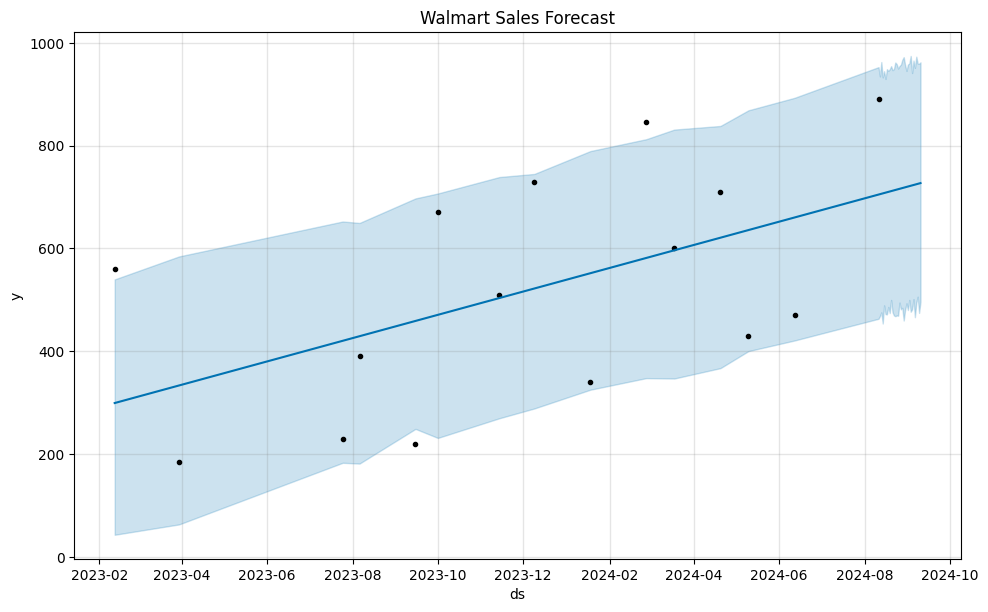

In [175]:
model.plot(forecast)
plt.title("Walmart Sales Forecast")
plt.show()

In [176]:
import joblib
joblib.dump(model, "sales_forecast_model.pkl")

['sales_forecast_model.pkl']

In [177]:
from google.colab import files
files.download("sales_forecast_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [178]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [179]:
df = pd.read_csv("daily_sales.csv")
df['ds'] = pd.to_datetime(df['ds'])  # Prophet requires datetime

In [206]:
# model_training.ipynb

# Clean column names: strip spaces and lowercase them
df.columns = df.columns.str.strip().str.lower()

# Print the columns to verify
print(df.columns)

# Rename to Prophet format
df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Ensure 'ds' is datetime
df['ds'] = pd.to_datetime(df['ds'])

# Now fit the model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ft4akvo/b8o4mw0i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ft4akvo/1fevdlgb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94955', 'data', 'file=/tmp/tmp3ft4akvo/b8o4mw0i.json', 'init=/tmp/tmp3ft4akvo/1fevdlgb.json', 'output', 'file=/tmp/tmp3ft4akvo/prophet_modelbhgc4rcc/prophet_model-20250806170951.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:09:51 - cmdstanpy - INFO - Chain [1] start processing
I

Index(['product', 'category', 'sales', 'stock', 'discount (%)', 'store id',
       'ds'],
      dtype='object')


In [211]:
# model_training.ipynb

import pandas as pd
from prophet import Prophet
import joblib

# Load the daily_sales data explicitly
daily_sales = pd.read_csv("daily_sales.csv")

# Clean column names: strip spaces and lowercase them
daily_sales.columns = daily_sales.columns.str.strip().str.lower()

# Rename to Prophet format
daily_sales.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Ensure 'ds' is datetime
daily_sales['ds'] = pd.to_datetime(daily_sales['ds'])

# Train model using daily_sales
model = Prophet()
model.fit(daily_sales)

# Save model
joblib.dump(model, 'sales_forecast_model.pkl')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ft4akvo/xp0c3o7_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ft4akvo/jse0mwve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23221', 'data', 'file=/tmp/tmp3ft4akvo/xp0c3o7_.json', 'init=/tmp/tmp3ft4akvo/jse0mwve.json', 'output', 'file=/tmp/tmp3ft4akvo/prophet_modelgrs6ufmn/prophet_model-20250806171338.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:13:38 - cmdstanpy - INFO - Chain [1] start processing
I

['sales_forecast_model.pkl']